# Prediction test(computing error)

#### Hyperparameters
 _AMOUNT_RANDOM_CANDIDATE_SPLITS = 20  

 _REGRESSION_TREE_MAX_DEPTH = 5
 
 _R = 20  
 
 _LEARNING_RATE = 0.1  
 
 _K = 250 
 
 _T = 10
 
 500 images

In [1]:
import src as fa
import pickle
import matplotlib.pyplot as plt
import numpy as np 


## Compute error for single test image

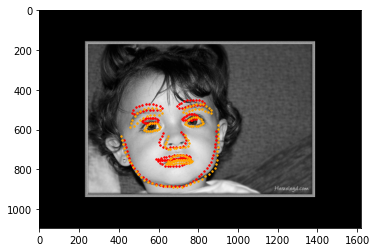

In [12]:
model = pickle.load(open("run_output/run_output_model.p", "rb"))

test_names = fa.get_all_file_names('data/test')
file = test_names[329]

predict_result = model.prediction_with_S_true("data/test/"+file, "data/annotation/")
if predict_result is None:
    print("prediction failed ...")
else:
    I_padded, S_hat_predicted, features_hat_predicted, S_true = predict_result
    fig, ax = plt.subplots()
    ax.scatter(S_hat_predicted[:,0],S_hat_predicted[:,1],c='r',s=2)
    ax.scatter(S_true[:,0],S_true[:,1],c='orange',s=2)

    ax.imshow(I_padded,cmap='gray')


In [3]:
def compute_error(S_hat, S_true):
    interocular_distance = np.linalg.norm(S_true[153].astype(np.int32)-S_true[114].astype(np.int32))
    average_distance = np.linalg.norm(S_hat - S_true)/interocular_distance
    return average_distance.mean()

In [13]:
compute_error(S_hat_predicted, S_true)

3.394806887685921

## Compute mean error for multiple(n) test images

In [22]:
from tqdm import tqdm

model = pickle.load(open("run_output/run_output_model.p", "rb"))

test_names = fa.get_all_file_names('data/test')
result = 0
n = 20
for i in tqdm(range(n)):
    file = test_names[i]
    predict_result = model.prediction_with_S_true("data/test/"+file, "data/annotation/")
    if predict_result is None:
        print("prediction failed ...")
    else:
        I_padded, S_hat_predicted, features_hat_predicted, S_true = predict_result
    result += compute_error(S_hat_predicted, S_true)
    
result / n

100%|██████████| 20/20 [00:57<00:00,  2.89s/it]


4.197761100140465